In [1]:
# .dcm which a way to store medical scans
!pip install pydicom

In [2]:
import pydicom
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [3]:
img = pydicom.dcmread('Vida_Head.MR.Comp_DR-Gain_DR.1005.1.2021.04.27.14.20.13.818.14380335 (1).dcm')

In [4]:
img_array = img.pixel_array.astype(float)

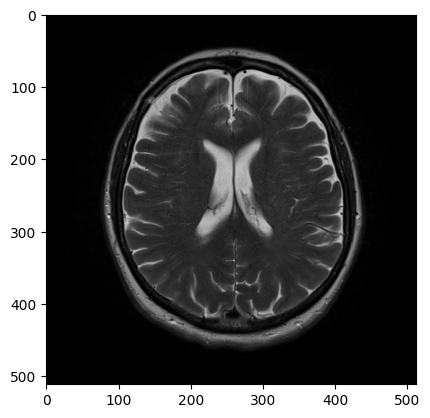

In [5]:
plt.imshow(img_array, cmap='grey')

In [6]:
# Scaling
# Min Max Scaling
# X - Xmin / Xmax - Xmin

img_array = (img_array - np.min(img_array)) / (np.max(img_array) - np.min(img_array))

In [7]:
h, w = img_array.shape # channels, c = 1 because black and white
pixels = img_array.reshape(h*w, 1)

In [8]:
# Elbow Method

In [9]:
sum_of_distances = []

In [10]:
for i in range(2,11):
    model = KMeans(n_clusters=i)
    model.fit(pixels)
    sum_of_distances.append(model.inertia_)

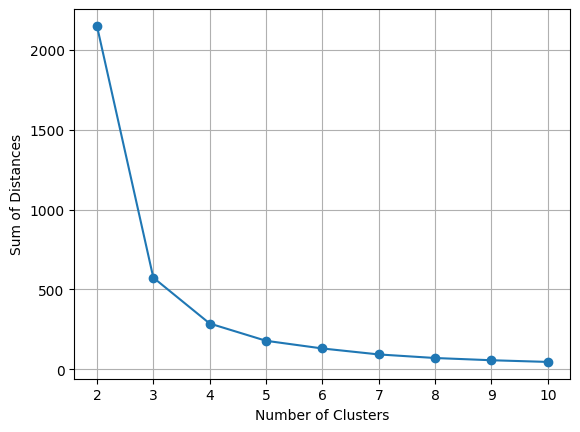

In [11]:
plt.plot(range(2,11), sum_of_distances, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Distances')
plt.grid(True)

In [12]:
model = KMeans(n_clusters=4)
group_number = model.fit_predict(pixels)


In [13]:
segmented_image = model.cluster_centers_[group_number].reshape(h,w)

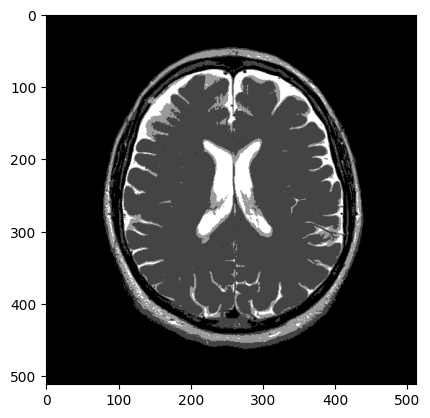

In [14]:
plt.imshow(segmented_image, cmap='grey')

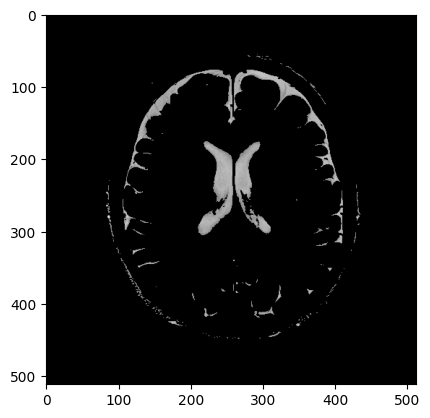

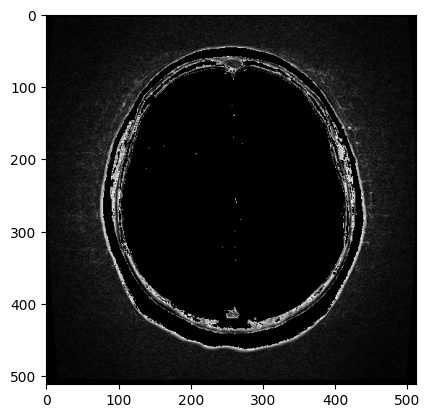

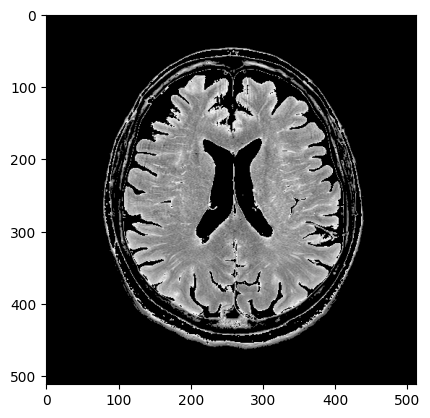

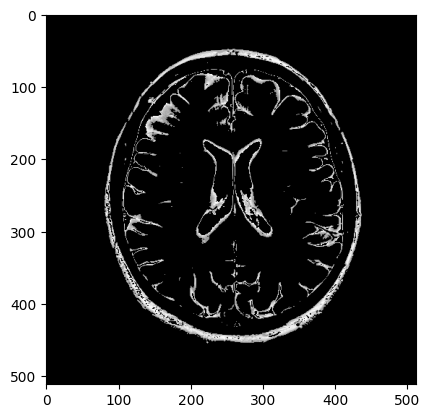

In [15]:
for i in range(4):
    cluster_mask = group_number.reshape(h,w)==i
    segment = img_array * cluster_mask

    plt.figure()
    plt.imshow(segment, cmap='grey')